In [43]:
import tensorflow as tf
import random
from tensorflow import keras
from tensorflow.keras import*
from keras_tuner import RandomSearch
from tensorflow.keras.layers import *
import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rn
from matplotlib.patches import ConnectionPatch
import plotly.graph_objects as go
from sklearn.metrics import* #confusion_matrix,accuracy_score,classification_report,precision_score,recall_score

from scipy import stats
import regex as re


seed = 42

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [44]:
df=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=df.load_data()

In [45]:
x_train.shape

(60000, 28, 28)

In [46]:
len(x_train)

60000

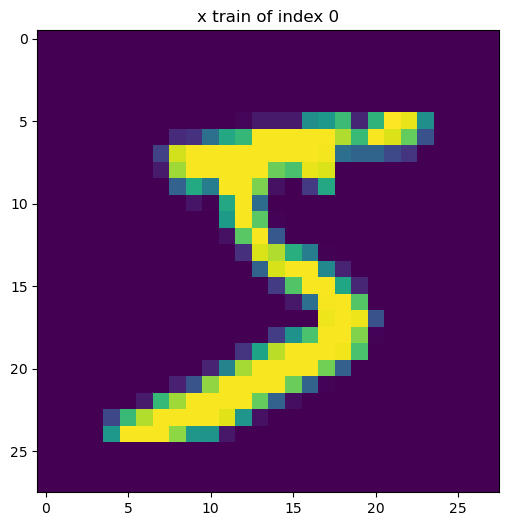

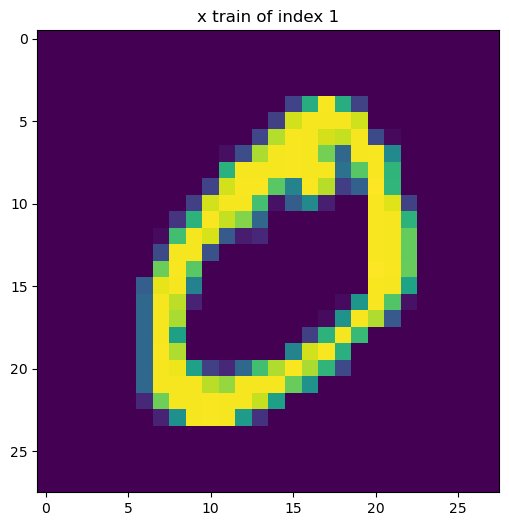

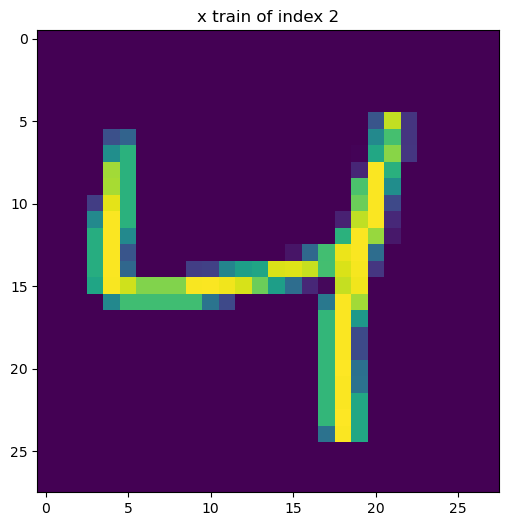

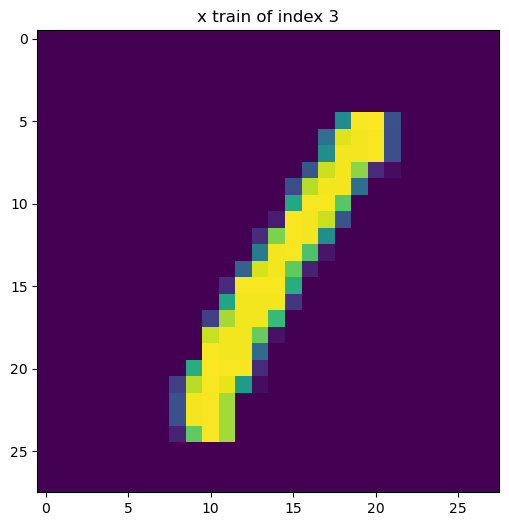

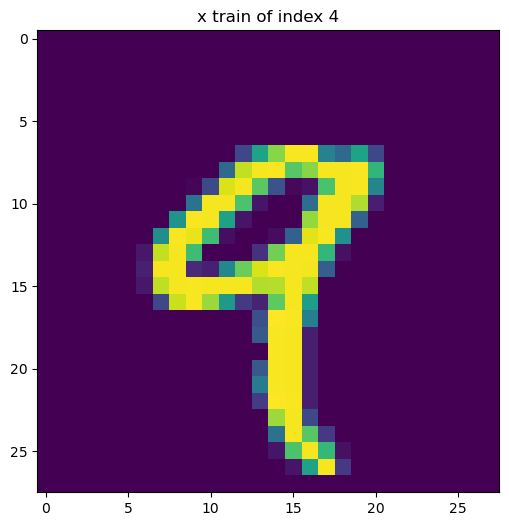

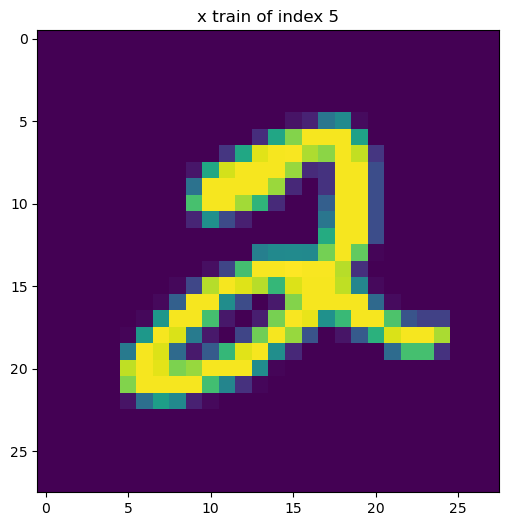

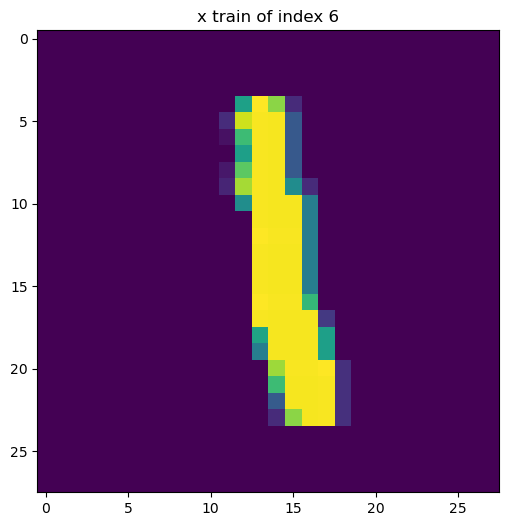

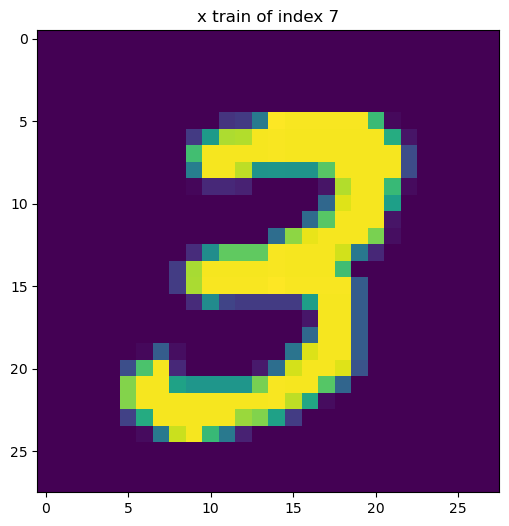

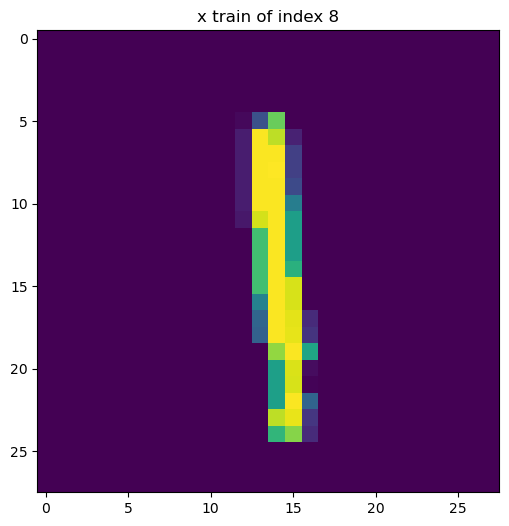

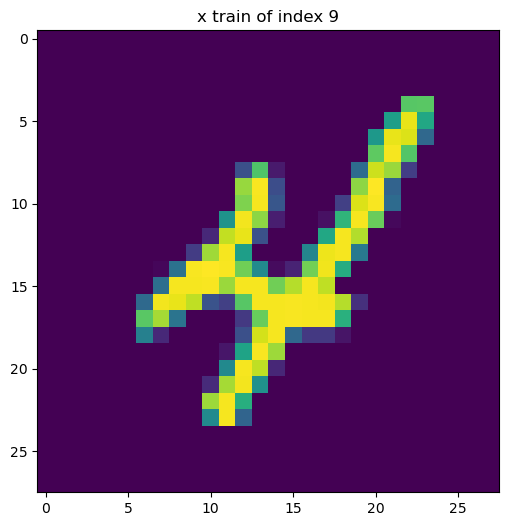

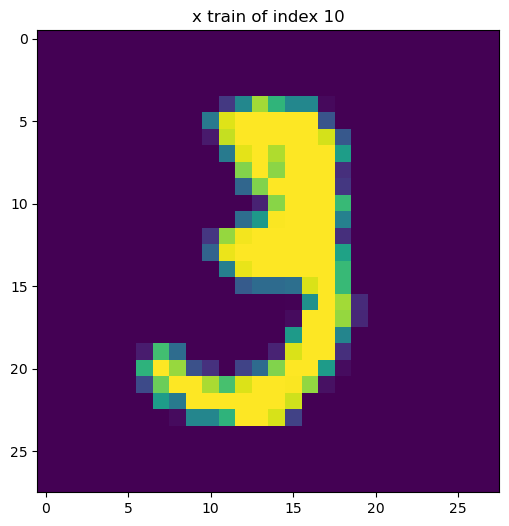

In [47]:
for x in range(11):
    plt.figure(figsize=(12,6))
    plt.title(f'x train of index {x}')
    plt.imshow(x_train[x])

In [48]:
x_train = x_train.reshape((60000,-1))
x_test = x_test.reshape((10000,-1))

In [49]:
x_train[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [50]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()

In [51]:
x_train=standard.fit_transform(x_train)
x_test=standard.fit_transform(x_test)

In [52]:
x_train.shape

(60000, 784)

In [53]:
x_val=x_train[50000:]
y_val=y_train[50000:]

In [54]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)
y_val=to_categorical(y_val,num_classes=10)

In [55]:
model =Sequential()
model.add(Dense(16,activation="relu",kernel_initializer="glorot_uniform",bias_initializer="zeros",input_dim=x_train.shape[1]))
model.add(Dense(32,activation="relu",kernel_initializer="glorot_uniform",bias_initializer="zeros"))
model.add(Dense(128,activation="relu",kernel_initializer="glorot_uniform",bias_initializer="zeros"))
model.add(Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

In [56]:
hist=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=15,batch_size=128)

Epoch 1/15
469/469 [==============================] - 3s 5ms/step - loss: 0.4948 - accuracy: 0.8453 - val_loss: 0.1887 - val_accuracy: 0.9454
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2004 - accuracy: 0.9405 - val_loss: 0.1484 - val_accuracy: 0.9539
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1608 - accuracy: 0.9512 - val_loss: 0.1149 - val_accuracy: 0.9650
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1404 - accuracy: 0.9565 - val_loss: 0.1002 - val_accuracy: 0.9704
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1259 - accuracy: 0.9609 - val_loss: 0.0950 - val_accuracy: 0.9710
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1141 - accuracy: 0.9642 - val_loss: 0.0844 - val_accuracy: 0.9742
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1059 - accuracy: 0.9667 - val_loss: 0.0824 - val_accuracy: 0.9735
Epoch 

In [67]:
predicted=model.predict(x_test)
predicted.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

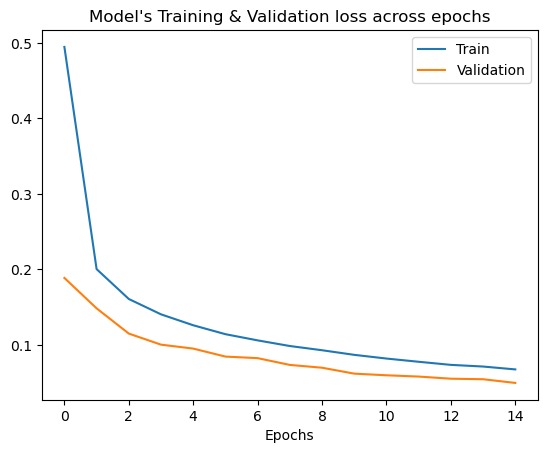

In [58]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

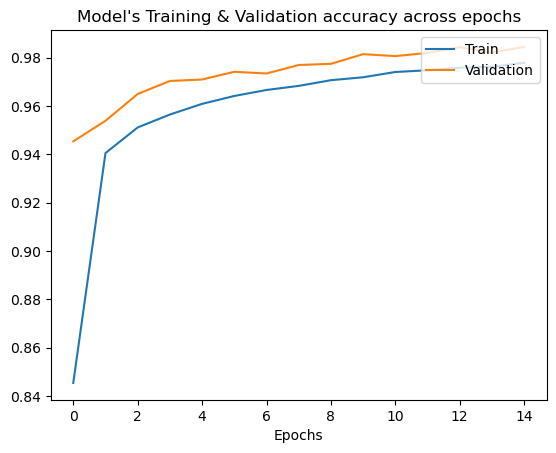

In [59]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model's Training & Validation accuracy across epochs")
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [60]:
y_true = y_test.argmax(axis=1)
y_true

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [61]:
accuracy = accuracy_score(y_true, predicted.argmax(axis=1))
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9563


In [76]:
class_rep=classification_report(y_true,predicted.argmax(axis=1))
class_rep

'              precision    recall  f1-score   support\n\n           0       0.96      0.98      0.97       980\n           1       0.97      0.99      0.98      1135\n           2       0.96      0.95      0.96      1032\n           3       0.94      0.96      0.95      1010\n           4       0.96      0.95      0.96       982\n           5       0.94      0.93      0.94       892\n           6       0.97      0.96      0.96       958\n           7       0.94      0.97      0.95      1028\n           8       0.95      0.94      0.94       974\n           9       0.96      0.93      0.95      1009\n\n    accuracy                           0.96     10000\n   macro avg       0.96      0.96      0.96     10000\nweighted avg       0.96      0.96      0.96     10000\n'

In [63]:
conf_matrix = confusion_matrix(y_true, predicted.argmax(axis=1))
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[ 962    0    3    3    1    1    4    1    4    1]
 [   0 1125    3    1    0    1    1    2    2    0]
 [   6    7  983    8    1    1    5   12    9    0]
 [   2    3   10  966    0   12    1    8    7    1]
 [   5    4    5    0  936    1    7    8    3   13]
 [   4    2    1   27    0  833    5    3   13    4]
 [  11    2    2    1   10   10  915    1    4    2]
 [   2    6   12    4    0    1    0  993    1    9]
 [   2    2    6   13    4   14    5    9  915    4]
 [   4    8    0    7   20    9    1   19    6  935]]
